In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [298]:
df = pd.read_csv('./data/data_home3.csv', on_bad_lines='warn')
df

,address,name,rssi,txPower,isConnectable,local_x,local_y,local_z,latitude,longitude,timestamp,rawData
0,7E:99:35:2B:65:70,NaN,-90,127,False,0.000000,-0.450000,0.000000,39.722172,-105.182640,0.020000,7E:99:35:2B:65:70||-90|127|false|UNKNOWN|1|0|2...
1,33:D6:7C:E5:FD:C5,NaN,-68,127,False,0.000000,-0.450000,0.000000,39.722172,-105.182640,0.020000,33:D6:7C:E5:FD:C5||-68|127|false|UNKNOWN|1|0|2...
2,24:FC:E5:B8:A4:6B,[TV] Samsung 8 Series (75),-80,127,False,0.000000,-0.450000,0.000000,39.722172,-105.182640,0.020000,24:FC:E5:B8:A4:6B|[TV] Samsung 8 Series (75)|-...
3,33:D6:7C:E5:FD:C5,NaN,-75,127,False,0.000000,-0.450000,0.000000,39.722172,-105.182640,0.020000,33:D6:7C:E5:FD:C5||-75|127|false|UNKNOWN|1|0|2...
4,0D:24:F1:43:F3:99,NaN,-77,127,False,0.000000,-0.450000,0.000000,39.722172,-105.182640,0.020000,0D:24:F1:43:F3:99||-77|127|false|UNKNOWN|1|0|2...
...,...,...,...,...,...,...,...,...,...,...,...,...
7202,CD:A4:CF:45:F7:FF,NaN,-89,127,True,2.962284,-0.236670,8.378628,39.722137,-105.182724,367.461212,CD:A4:CF:45:F7:FF||-89|127|true|UNKNOWN|1|0|25...
7203,C9:E9:9D:0E:0C:2A,NaN,-75,127,False,2.823746,0.099528,8.494057,39.722137,-105.182724,368.901184,C9:E9:9D:0E:0C:2A||-75|127|false|UNKNOWN|1|0|2...
7204,D1:5E:32:AD:FC:FC,NaN,-89,127,False,2.851407,-0.369790,8.623201,39.722134,-105.182716,378.215973,D1:5E:32:AD:FC:FC||-89|127|false|UNKNOWN|1|0|2...
7205,CA:ED:36:1B:66:F6,NaN,-85,127,True,2.368824,-0.462867,8.411190,39.722134,-105.182716,379.678589,CA:ED:36:1B:66:F6||-85|127|true|UNKNOWN|1|0|25...


In [299]:
df.columns

Index(['address', 'name', 'rssi', 'txPower', 'isConnectable', 'local_x',
       'local_y', 'local_z', 'latitude', 'longitude', 'timestamp', 'rawData'],
      dtype='object')

In [300]:
df = df.where(df['rssi'] < 0).dropna(how='all')

In [301]:
address = 0
sanitizedName = 1
rssi = 2
txPower = 3
isConnectable = 4
deviceType = 5
primaryPhy = 6
secondaryPhy = 7
advertisingSetId = 8
periodicInterval = 9
manufacturerData = 10
serviceUuids = 11
serviceData = 12
advertisingFlags = 13
rawBytes = 14
timestamp = 15


In [302]:
df['rawData'][0].split('|')

['7E:99:35:2B:65:70',
 '',
 '-90',
 '127',
 'false',
 'UNKNOWN',
 '1',
 '0',
 '255',
 '0',
 '6:AQkgAjQcGoqTvcCMP6WvjdO/rbK/3C1BhQRP',
 '',
 '',
 '',
 'Hv8GAAEJIAI0HBqKk73AjD+lr43Tv62yv9wtQYUETwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA=',
 '402010056']

In [303]:
df['manufacturer_data'] = df['rawData'].apply(lambda x: x.split('|')[manufacturerData])
print(df['manufacturer_data'])

df['company_id']=df['manufacturer_data'].apply(lambda x: x.split (':')[0])
print(df['company_id'].unique())

int_004C = int('004C', 16)

df_company_ids = pd.read_csv('./data/company_id.csv', names=['id', 'name'])

df_company_ids['id_converted'] = df_company_ids['id'].apply(lambda x: int(x, 16))
print(df_company_ids)


df_company_ids = pd.concat([
    df_company_ids,
    pd.DataFrame([{'id': 'UNKNOWN', 'name': 'UNKNOWN', 'id_converted': -1}])
], ignore_index=True)

def get_company_id(val):
    try:
        if val == '':
            return -1
        return int(val, 16)
    except Exception:
        return -1

df['company_id_int'] = df['company_id'].apply(get_company_id)
df = df.merge(df_company_ids[['id_converted', 'name']].rename(columns={'name': 'company_name'}), 
              left_on='company_id_int', right_on='id_converted', how='left')


print(df)



0        6:AQkgAjQcGoqTvcCMP6WvjdO/rbK/3C1BhQRP
1        6:AQkgIstoioGjPeyh5dfZ70g02Uf/B1d4yJf3
2          117:QgQBgGAk/OW4pGsm/OW4pGoBAAAAAAAA
3        6:AQkgIstoioGjPeyh5dfZ70g02Uf/B1d4yJf3
4                               76:CQYDpsCoDGo=
                         ...                   
7202    76:EhkgsEoiMiaRYgfZHqR/5ig8EhCge6/bNgMv
7203                                76:EgIAAw==
7204                                76:EgIAAQ==
7205    76:EhkQ8Erlcd2wKgUqPZ/lfbT4QzT0drsYDwFE
7206    76:EhkgsEoiMiaRYgfZHqR/5ig8EhCge6/bNgMv
Name: manufacturer_data, Length: 6611, dtype: object
['6' '117' '76' '47619' '224' '' '2168' '28790' '60552' '61679' '2345']
          id                                   name  id_converted
0     0x0000          Ericsson Technology Licensing             0
1     0x0001                    Nokia Mobile Phones             1
2     0x0002                            Intel Corp.             2
3     0x0003                              IBM Corp.             3
4     0x0004     

In [304]:
import base64
APPLE = 0x004C
def has_findmy_payload(raw_b64: str) -> bool:
    b = base64.b64decode(raw_b64)
    i = 0
    while i < len(b):
        ln = b[i]
        if ln == 0: break
        ad_type = b[i+1]
        data = b[i+2 : i+1+ln]
        if ad_type == 0xFF and len(data) >= 4:
            company = data[0] | (data[1] << 8)
            if company == APPLE:
                if data[2] == 0x12 and data[3] == 0x19:
                    return True
        i += 1 + ln
    return False

In [305]:
df['rawBytes'] = df['rawData'].apply(lambda x: x.split('|')[rawBytes])
df['has_findmy_payload'] = df['rawBytes'].apply(has_findmy_payload)
df['has_findmy_payload'].value_counts()

has_findmy_payload
False    6326
True      285
Name: count, dtype: int64

In [306]:
df['serviceUuids'] = df['rawData'].apply(lambda x: x.split('|')[serviceUuids])
df['serviceUuids'].unique()

array(['', '02A6C0D0-0451-4000-B000-FB3210111989',
       '0000FE9F-0000-1000-8000-00805F9B34FB',
       '26D91A37-C279-4D0F-96A1-532CE41CE0F6',
       '0000EC88-0000-1000-8000-00805F9B34FB'], dtype=object)

In [307]:
df['company_name'].unique()

array(['Microsoft', 'Wimoto Technologies Inc', 'Creative Technology Ltd.',
       nan, 'Comarch SA', 'UNKNOWN'], dtype=object)

In [308]:
len(df['address'].unique())

36

In [309]:
heatmap_filtered_df = df[df['address'] == "CD:A4:CF:45:F7:FF"]

In [313]:
dim_size = 100

min_x = heatmap_filtered_df['local_x'].quantile(0.01)
min_y = heatmap_filtered_df['local_y'].quantile(0.01)
min_z = heatmap_filtered_df['local_z'].quantile(0.01)

max_x = heatmap_filtered_df['local_x'].quantile(0.99)
max_y = heatmap_filtered_df['local_y'].quantile(0.99)
max_z = heatmap_filtered_df['local_z'].quantile(0.99)

scale_x = (max_x - min_x) / dim_size
scale_y = (max_y - min_y) / dim_size
scale_z = (max_z - min_z) / dim_size


print(scale_x)
print(scale_y)
print(scale_z)


heatmap_filtered_df['x_hash'] = np.floor((heatmap_filtered_df['local_x'] - min_x) / scale_x).astype(int)
heatmap_filtered_df['y_hash'] = np.floor((heatmap_filtered_df['local_y'] - min_y) / scale_y).astype(int)
heatmap_filtered_df['z_hash'] = np.floor((heatmap_filtered_df['local_z'] - min_z) / scale_z).astype(int)

heatmap_filtered_df['x_hash'] = heatmap_filtered_df['x_hash'].clip(0, dim_size)
heatmap_filtered_df['z_hash'] = heatmap_filtered_df['z_hash'].clip(0, dim_size)
heatmap_filtered_df['y_hash'] = heatmap_filtered_df['y_hash'].clip(0, dim_size)

print("z hash max", heatmap_filtered_df['z_hash'].max())
print("y hash max", heatmap_filtered_df['y_hash'].max())
print("x hash max", heatmap_filtered_df['x_hash'].max())


print(len(heatmap_filtered_df['x_hash'].unique()))
print(len(heatmap_filtered_df['y_hash'].unique()))
print(len(heatmap_filtered_df['z_hash'].unique()))

heatmap = np.zeros((dim_size+1, dim_size+1))


def normalize_rssi(rssi):
    return (rssi - min_rssi) / (max_rssi - min_rssi)


min_rssi = heatmap_filtered_df['rssi'].quantile(0.05)
max_rssi = heatmap_filtered_df['rssi'].quantile(0.95)

heatmap_filtered_df['normalized_rssi'] = normalize_rssi(heatmap_filtered_df['rssi'])


for i in range(heatmap.shape[0]):
    for j in range(heatmap.shape[1]):

        median_percent = heatmap_filtered_df[(heatmap_filtered_df['x_hash'] == i) & (heatmap_filtered_df['z_hash'] == j)]['normalized_rssi'].median()

        heatmap[i,j] = median_percent


heatmap_probabilities = np.zeros((dim_size+1, dim_size+1))

# for i in range(heatmap_probabilities.shape[0]):
#     for j in range(heatmap_probabilities.shape[1]):

#         def get_distance_p(x, z, df):
            

0.07391970679999998
0.0029265586199999976
0.14244479699899998
z hash max 100
y hash max 100
x hash max 100
60
52
50


C:\Users\mytur\AppData\Local\Temp\ipykernel_11040\1772957586.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_filtered_df['x_hash'] = np.floor((heatmap_filtered_df['local_x'] - min_x) / scale_x).astype(int)
C:\Users\mytur\AppData\Local\Temp\ipykernel_11040\1772957586.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_filtered_df['y_hash'] = np.floor((heatmap_filtered_df['local_y'] - min_y) / scale_y).astype(int)
C:\Users\mytur\AppData\Local\Temp\ipykernel_11040\1772957586.py:23: Settin

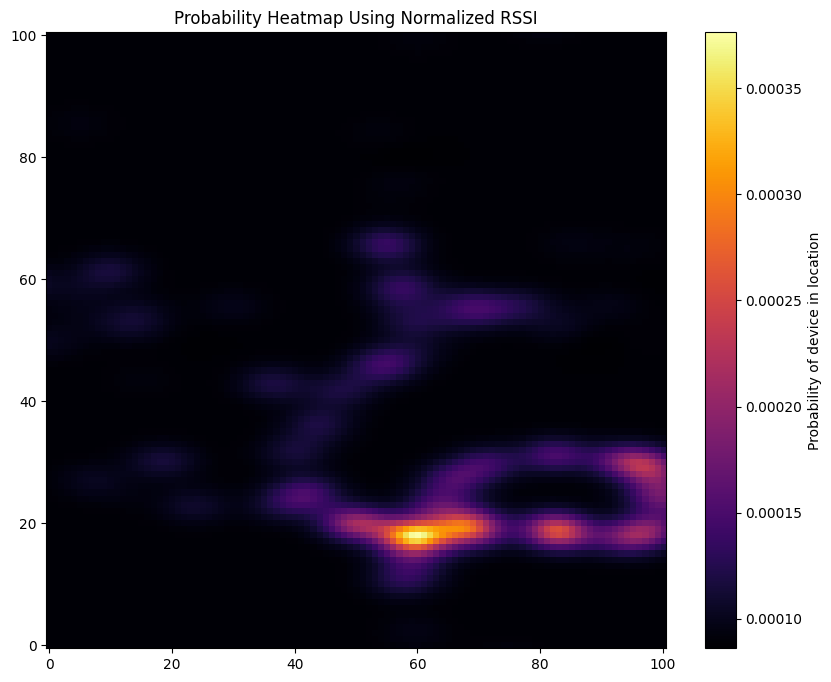

(60, 18)
0.0003763427826245702
Most probable location (x, z): (0.14950443139999958, 2.5323081445814997)


In [ ]:
x_centers = min_x + (np.arange(dim_size + 1) + 0.5) * scale_x
z_centers = min_z + (np.arange(dim_size + 1) + 0.5) * scale_z

rssi = heatmap_filtered_df['normalized_rssi'].to_numpy(dtype=float)
px = heatmap_filtered_df['local_x'].to_numpy(dtype=float)
pz = heatmap_filtered_df['local_z'].to_numpy(dtype=float)
w = heatmap_filtered_df['normalized_rssi'].to_numpy(float)
px = heatmap_filtered_df['local_x'].to_numpy(float)
pz = heatmap_filtered_df['local_z'].to_numpy(float)

ell = 0.3
beta = 0.5

logW = np.empty((dim_size+1, dim_size+1), float)

for i, x in enumerate(x_centers):
    for j, z in enumerate(z_centers):
        d2 = (px - x)**2 + (pz - z)**2
        #softmax
        score = np.sum(w * np.exp(-0.5 * d2 / (ell**2)))
        logW[i,j] = beta * score

logW -= logW.max()
W = np.exp(logW)
heatmap_probabilities = W / (W.sum() + 1e-12)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(heatmap_probabilities.T, origin='lower', aspect='auto', cmap='inferno')
plt.colorbar(label='Probability of device in location')
plt.title('Probability Heatmap Using Normalized RSSI')
plt.show()


max_prob_idx = np.unravel_index(np.argmax(heatmap_probabilities), heatmap_probabilities.shape)
print(max_prob_idx)
print(heatmap_probabilities[max_prob_idx])

max_x_idx, max_z_idx = max_prob_idx

max_x_pos = min_x + (max_x_idx + 0.5) * scale_x
max_z_pos = min_z + (max_z_idx + 0.5) * scale_z

print("Most probable location (x, z):", (max_x_pos, max_z_pos))




In [199]:
df['z_hash'].unique()

array([ 0, -1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 29, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, -2, -3])

In [ ]:
df['address'].unique()

array(['7E:99:35:2B:65:70', '33:D6:7C:E5:FD:C5', '24:FC:E5:B8:A4:6B',
       '0D:24:F1:43:F3:99', 'C9:E9:9D:0E:0C:2A', '48:18:0A:9B:45:43',
       'D1:5E:32:AD:FC:FC', '66:27:43:94:42:43', 'CA:ED:36:1B:66:F6',
       '05:7A:17:32:4F:C4', '52:7E:30:E9:82:4B', 'C6:33:EA:5D:0A:E3',
       'CD:A4:CF:45:F7:FF', 'EF:00:86:F2:B7:89', 'D2:9C:BC:1C:45:69',
       '0C:EC:80:CA:BA:03', '60:02:13:F8:8C:76', '13:31:F3:A1:C5:8E',
       '0C:95:05:81:D4:3D', '20:0B:16:28:70:76', 'DD:86:B2:CF:15:82',
       '41:CD:CB:64:17:71', '40:4C:EA:A7:40:51', '0E:BF:D2:F9:DC:CF',
       'A4:C1:38:C1:64:EC', '6D:6F:0F:93:8F:27', '68:18:5C:54:93:21',
       '08:08:B4:92:03:D0', '51:C5:CE:2E:B7:E1', '38:A7:49:E8:89:44',
       '78:AC:06:B2:CB:7F', '20:FC:CA:76:22:D8', 'FC:B9:7E:62:05:A8',
       '61:51:B3:A8:55:6D', 'F8:89:37:7F:C5:D7', 'CE:A1:45:A0:05:7E'],
      dtype=object)

In [ ]:
len(df['address'].unique())

36

In [ ]:
df['rawData'][0]

'7E:99:35:2B:65:70||-90|127|false|UNKNOWN|1|0|255|0|6:AQkgAjQcGoqTvcCMP6WvjdO/rbK/3C1BhQRP||||Hv8GAAEJIAI0HBqKk73AjD+lr43Tv62yv9wtQYUETwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA=|402010056'

In [ ]:
# company = 'Apple, Inc.'
# filtered_df = df.where(df['company_name'] == company ).dropna(how='all')
# filtered_df = filtered_df.where(df['address'] == mac).dropna(how='all')= df
# filtered_df
# mac = 'CA:ED:36:1B:66:F6'

In [ ]:
addr_map = df.where(df['rssi'] < 0).dropna(how='all')
# addr_map = addr_map.where(addr_map['has_findmy_payload'] == True).dropna(how='all')
# addr_map = addr_map.where(addr_map['address'] == mac).dropna(how='all')
rssi_vals = addr_map['rssi'].to_numpy()


In [ ]:
y_str = 'local_z'
x_str = 'local_x'
z_str = 'local_y'

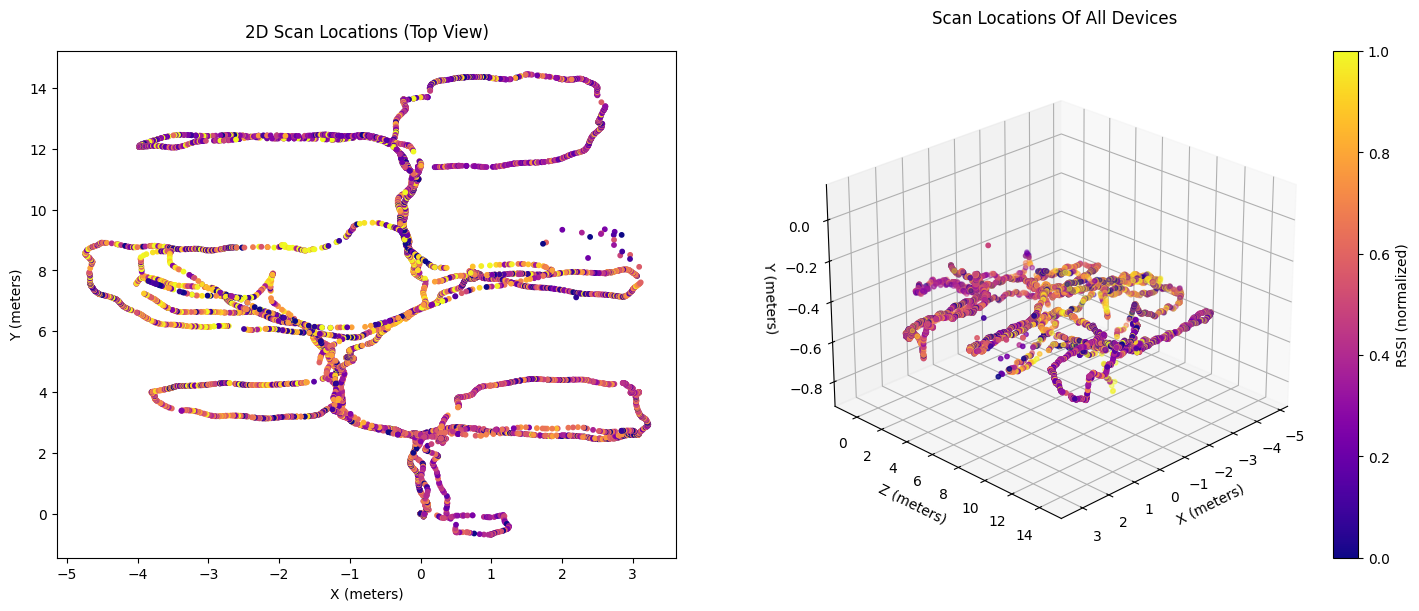

In [ ]:

min_x, max_x = addr_map[x_str].min(), addr_map[x_str].max()
min_y, max_y = addr_map[y_str].min(), addr_map[y_str].max()
min_z, max_z = addr_map[z_str].min(), addr_map[z_str].max()


lo = np.percentile(rssi_vals, 5)
hi = np.percentile(rssi_vals, 95)

colors = np.clip(rssi_vals, lo, hi)
colors = (colors - lo) / ((hi - lo) + 1e-9)

# name = addr_map['company_name'].iloc[0] if 'company_name' in addr_map.columns else str(mac_addr)

fig = plt.figure(figsize=(18, 6), constrained_layout=True)
gs = fig.add_gridspec(1, 3, width_ratios=[1.1, 1.75, 1.75])

ax_top = fig.add_subplot(gs[0, 1])
sc_top = ax_top.scatter(
    addr_map[x_str],
    addr_map[y_str],
    c=colors,
    cmap='plasma',
    s=10
)
ax_top.set_xlabel("X (meters)")
ax_top.set_ylabel("Y (meters)")
ax_top.set_title("2D Scan Locations (Top View)", pad=10)




ax_3d = fig.add_subplot(gs[0, 2], projection='3d')
sc_3d = ax_3d.scatter(
    addr_map[x_str],
    addr_map[y_str],
    addr_map[z_str],
    c=colors,
    cmap='plasma',
    s=10
)

ax_3d.set_xlabel("X (meters)")
ax_3d.set_ylabel("Z (meters)")
ax_3d.set_zlabel("Y (meters)")
ax_3d.set_title(f"Scan Locations Of All Devices", pad=20)
ax_3d.view_init(elev=25, azim=45)
ax_3d.set_proj_type("persp")
ax_3d.dist = 4
# ax_3d.set_xlim(min_x, max_x)
# ax_3d.set_ylim(min_z, max_z)
# ax_3d.set_zlim(min_y, max_y)

fig.colorbar(sc_3d, ax=[ax_top, ax_3d], fraction=0.046, pad=0.02, label="RSSI (normalized)")

plt.show()

In [ ]:
df['rssi'].max()

-40.0

In [ ]:
df['rssi'].min()

-108.0

In [ ]:
filtered_df = df

CA:ED:36:1B:66:F6


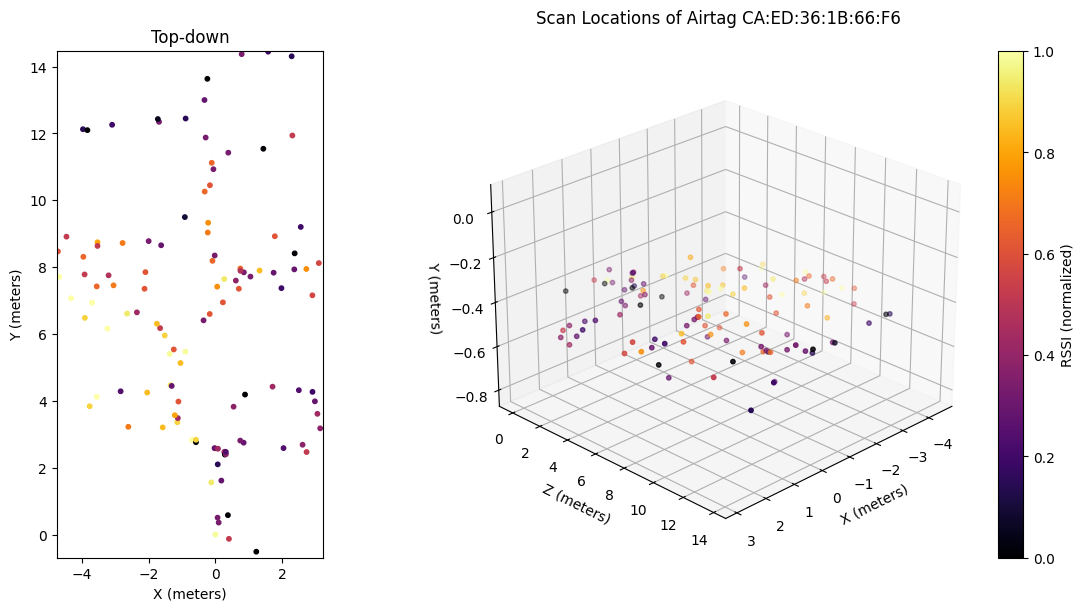

CD:A4:CF:45:F7:FF


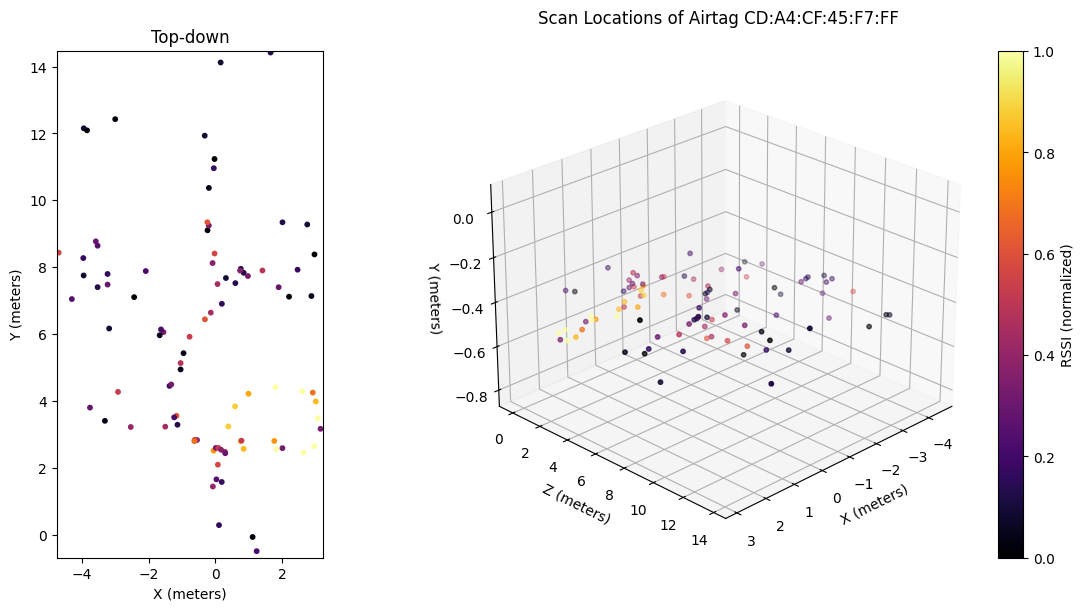

D2:9C:BC:1C:45:69


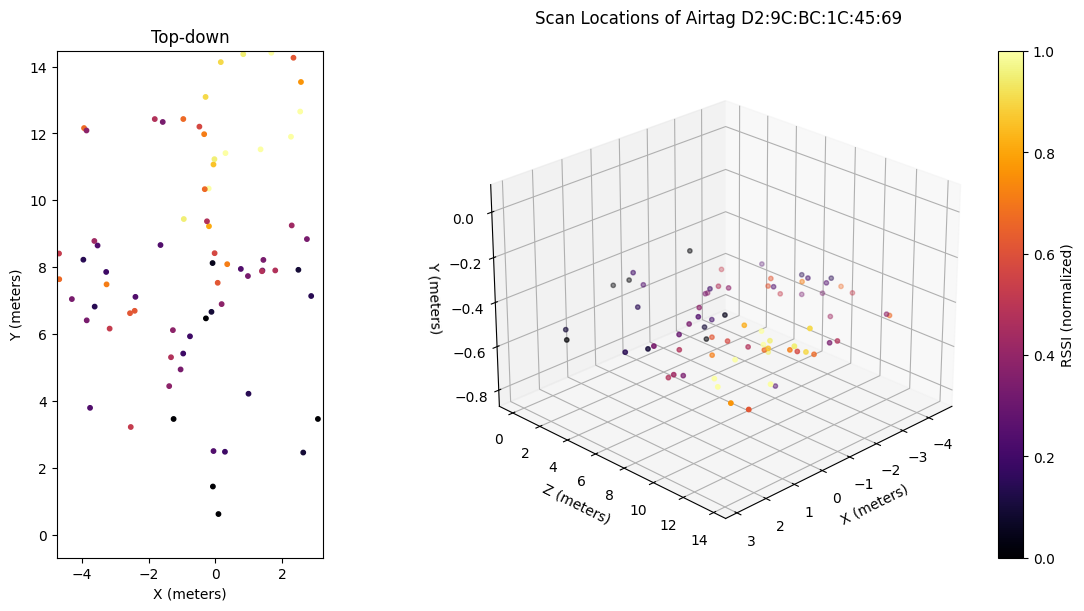

DD:86:B2:CF:15:82


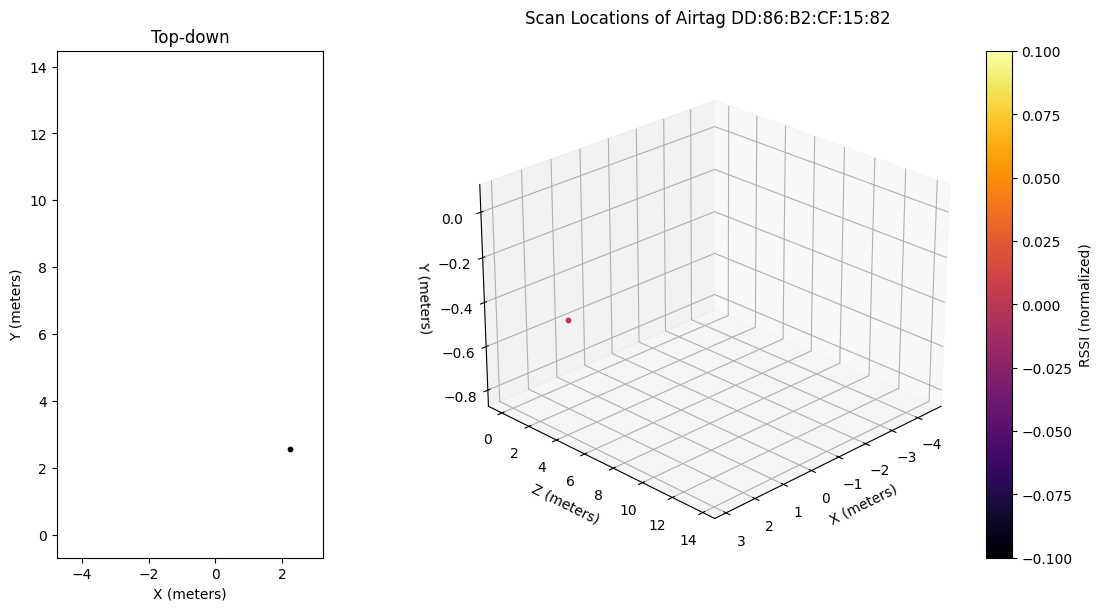

In [238]:
import numpy as np
import matplotlib.pyplot as plt

max_plots = 88

min_x, max_x = filtered_df[x_str].min(), filtered_df[x_str].max()
min_y, max_y = filtered_df[z_str].min(), filtered_df[z_str].max()
min_z, max_z = filtered_df[y_str].min(), filtered_df[y_str].max()

for i, mac_addr in enumerate(filtered_df['address'].dropna().unique()):
    if i >= max_plots:
        break

    addr_map = filtered_df[filtered_df['address'] == mac_addr]
    addr_map = addr_map.where(addr_map['rssi'] < 0).dropna(how='all')

    addr_map = addr_map.where(addr_map['has_findmy_payload'] == True).dropna(how='all')

    if addr_map.empty:
        continue

    rssi_vals = addr_map['rssi'].to_numpy()

    lo = np.percentile(rssi_vals, 5)
    hi = np.percentile(rssi_vals, 95)

    colors = np.clip(rssi_vals, lo, hi)
    colors = (colors - lo) / ((hi - lo) + 1e-9)

    name = addr_map['company_name'].iloc[0] if 'company_name' in addr_map.columns else str(mac_addr)

    fig = plt.figure(figsize=(18, 6), constrained_layout=True)
    gs = fig.add_gridspec(1, 3, width_ratios=[1.1, 1.75, 1.75])



    ax_top = fig.add_subplot(gs[0, 1])
    sc_top = ax_top.scatter(
        addr_map[x_str],
        addr_map[y_str],
        c=colors,
        cmap='inferno',
        s=10
    )
    ax_top.set_aspect('equal', adjustable='box')

    
    ax_top.set_xlabel("X (meters)")
    ax_top.set_ylabel("Y (meters)")
    ax_top.set_title("Top-down")
    ax_top.set_xlim(min_x, max_x)
    ax_top.set_ylim(min_z, max_z)


    ax_3d = fig.add_subplot(gs[0, 2], projection='3d')
    sc_3d = ax_3d.scatter(
        addr_map[x_str],
        addr_map[y_str],
        addr_map[z_str],
        c=colors,
        cmap='inferno',
        s=10
    )
    ax_3d.set_xlabel("X (meters)")
    ax_3d.set_ylabel("Z (meters)")
    ax_3d.set_zlabel("Y (meters)")
    ax_3d.set_title(f"Scan Locations of Airtag {mac_addr}", pad=20)
    print(mac_addr)
    ax_3d.view_init(elev=25, azim=45)
    ax_3d.set_proj_type("persp")
    ax_3d.dist = 4
    ax_3d.set_xlim(min_x, max_x)
    ax_3d.set_ylim(min_z, max_z)
    ax_3d.set_zlim(min_y, max_y)

    fig.colorbar(sc_3d, ax=[ax_top, ax_3d], fraction=0.046, pad=0.02, label="RSSI (normalized)")

    plt.show()



In [ ]:
df = df.where(df['rssi'] < 0).dropna(how='all')

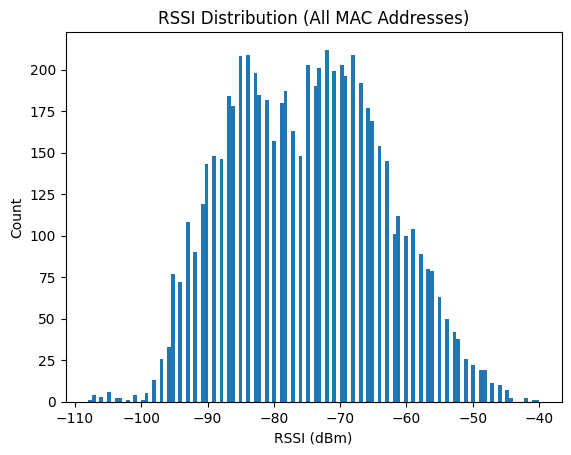

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['rssi'], bins=120)
plt.xlabel("RSSI (dBm)")
plt.ylabel("Count")
plt.title("RSSI Distribution (All MAC Addresses)")
plt.show()

In [ ]:
len(df['address'].unique())

36

C:\Users\mytur\AppData\Local\Temp\ipykernel_11040\3153813429.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  ax = plt.figure().add_subplot(projection='3d')
C:\Users\mytur\AppData\Local\Temp\ipykernel_11040\3153813429.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return (rssi - min_rssi) / (max_rssi - min_rssi)
C:\Users\mytur\AppData\Local\Temp\ipykernel_11040\3153813429.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return (rssi - min_rssi) / (max_rssi - min_rssi)
C:\Users\mytur\AppData\Local\Temp\ipykernel_11040\3153813429.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return (rssi - min_rssi) / (max_rssi - min_rssi)
C:\Users\mytur\AppData\Local\Temp\ip

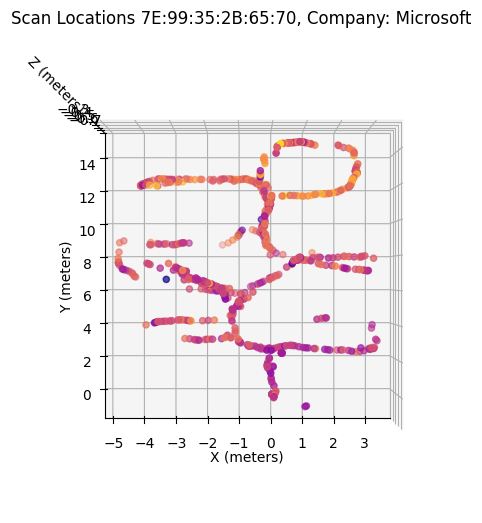

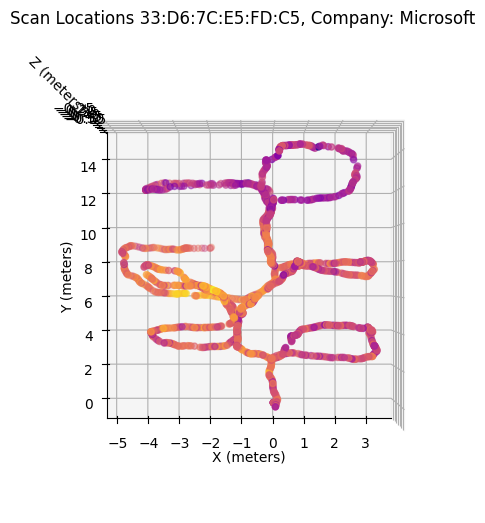

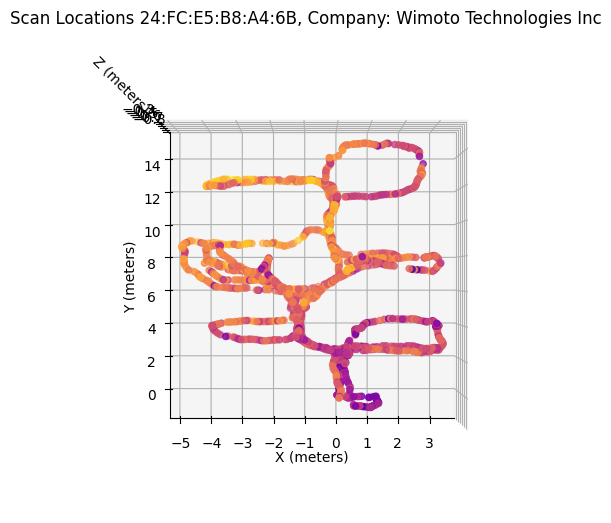

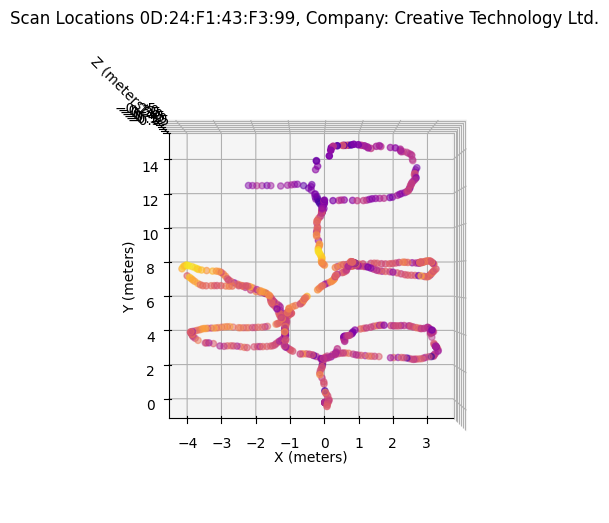

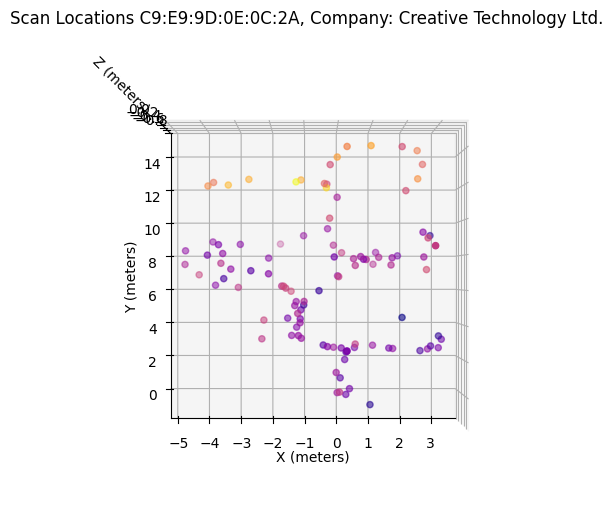

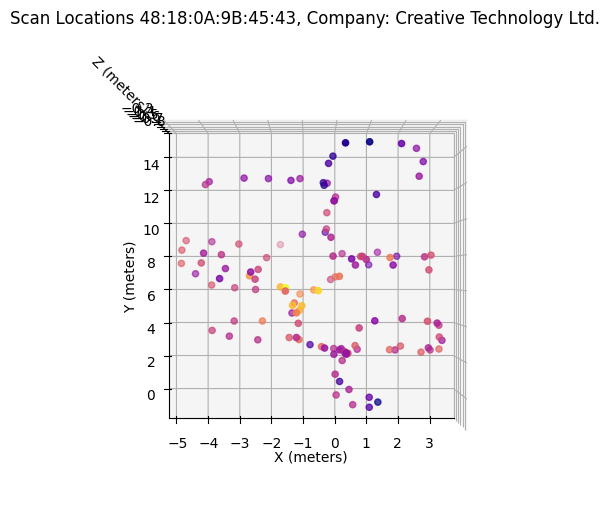

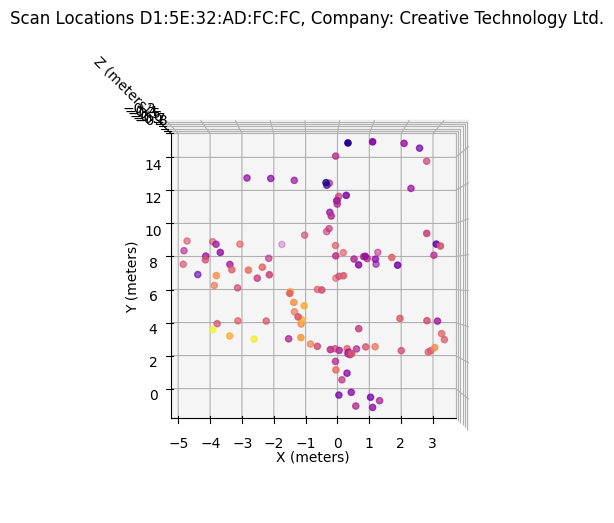

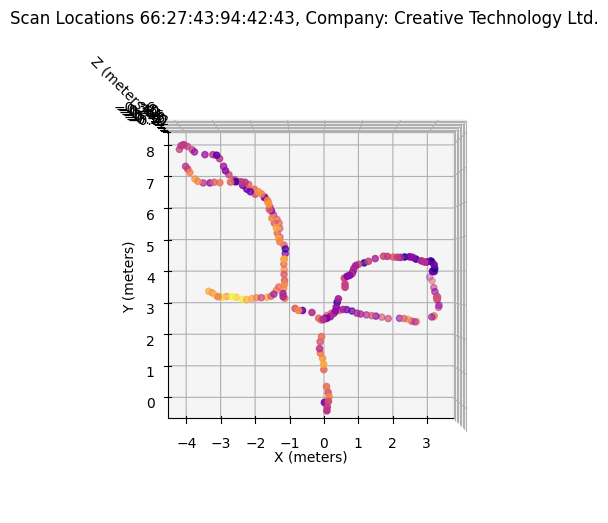

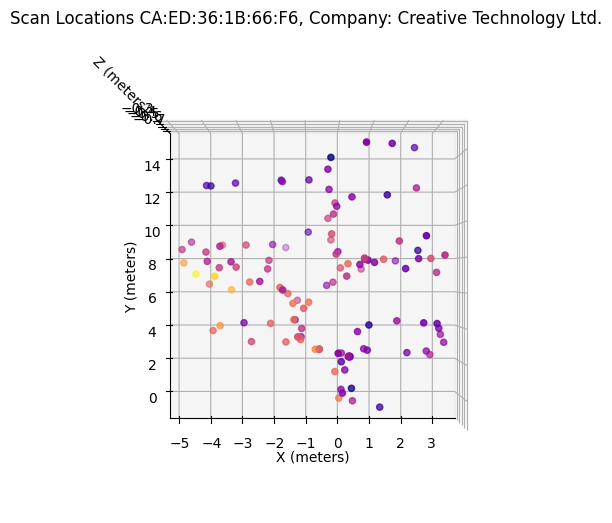

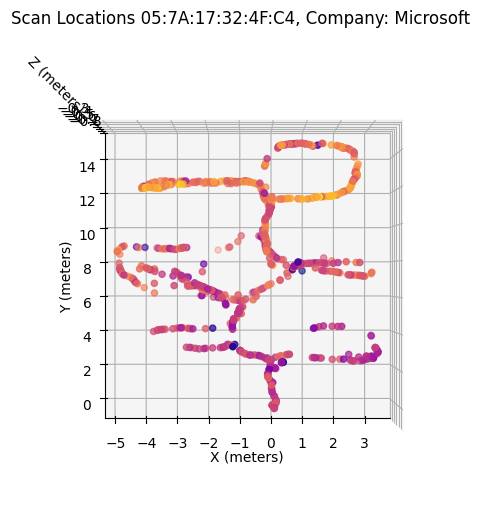

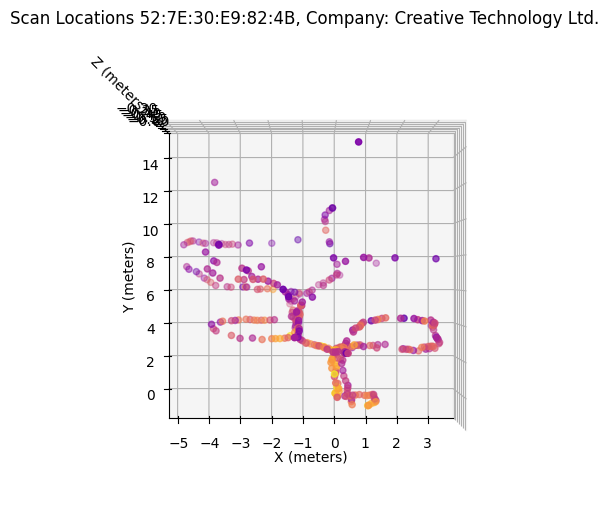

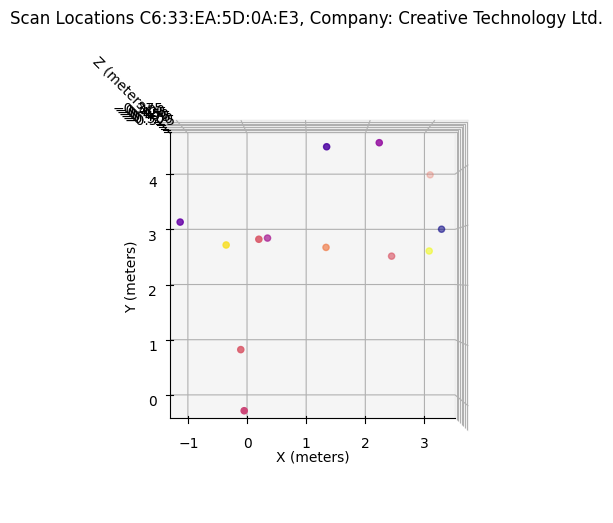

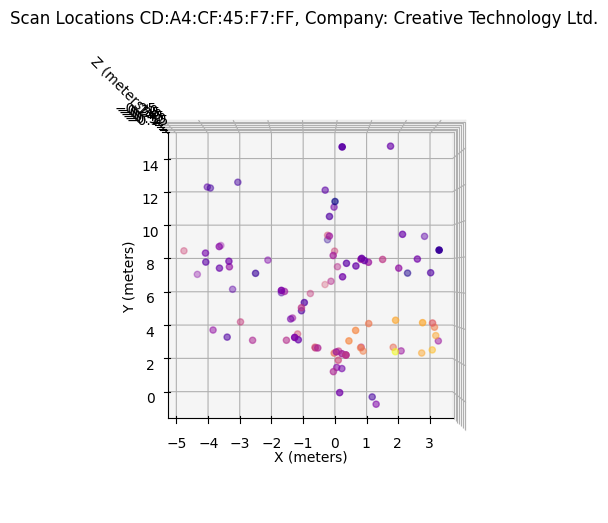

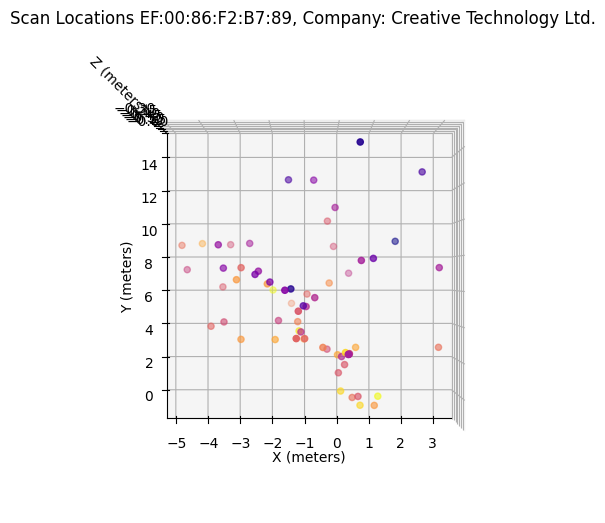

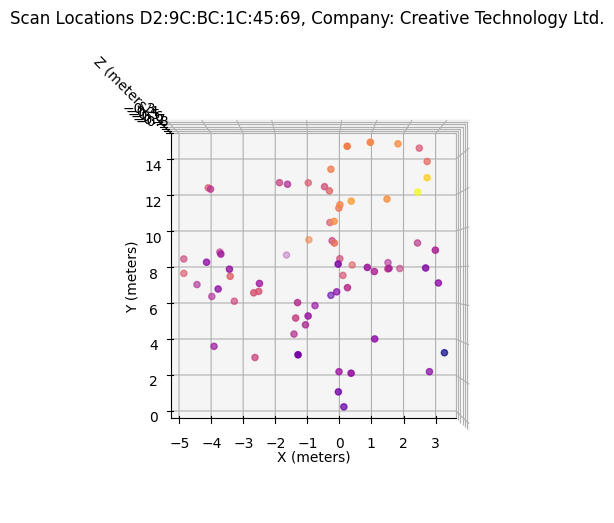

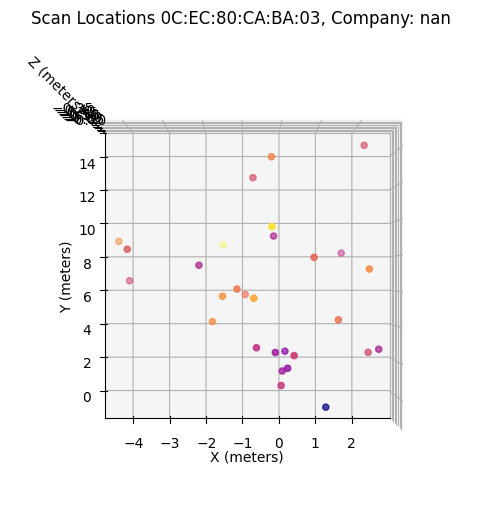

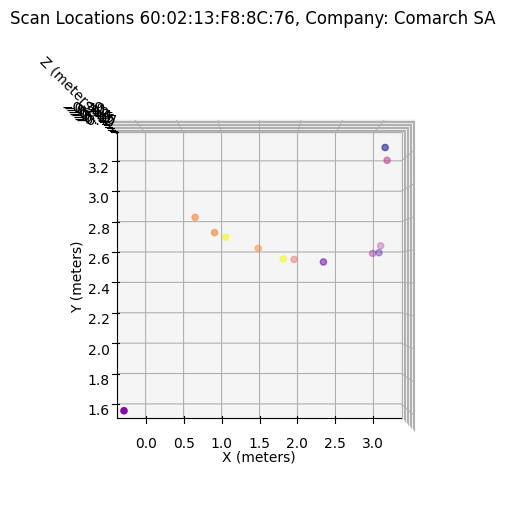

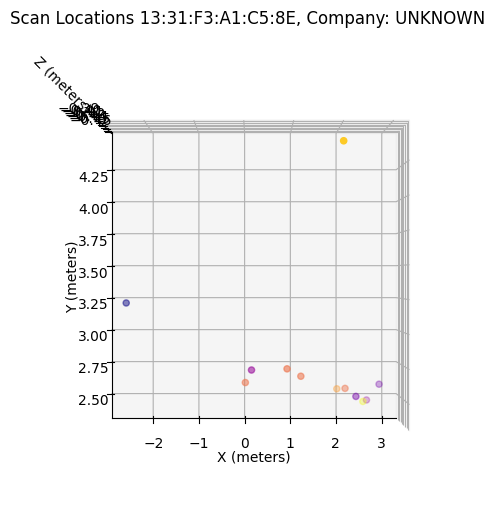

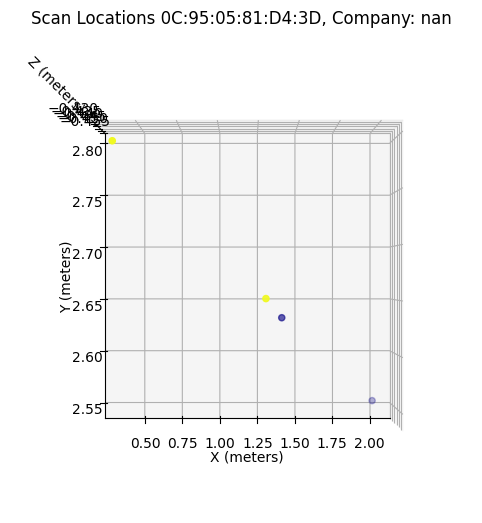

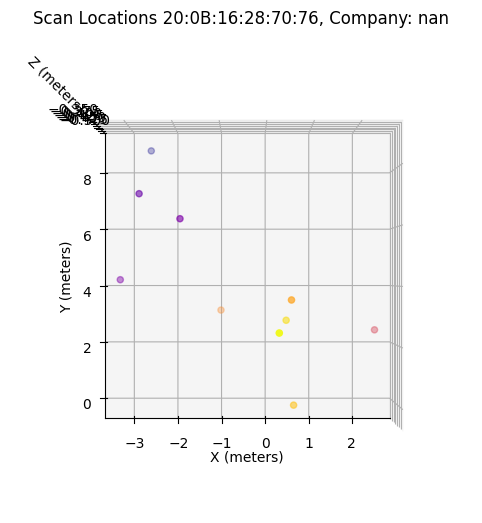

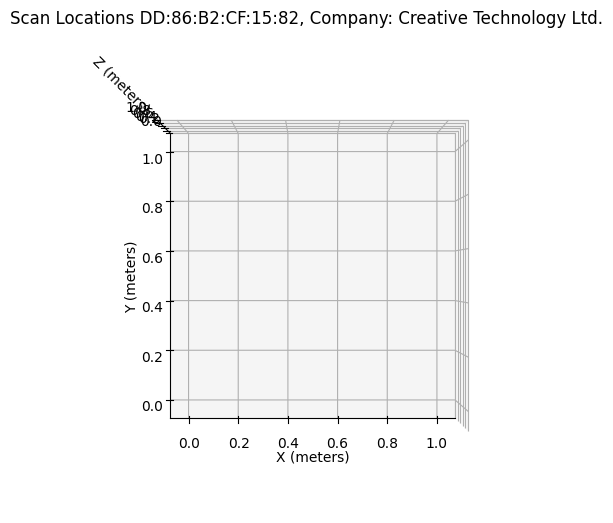

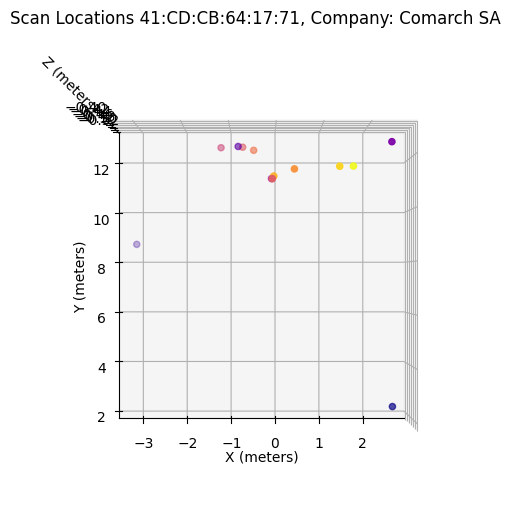

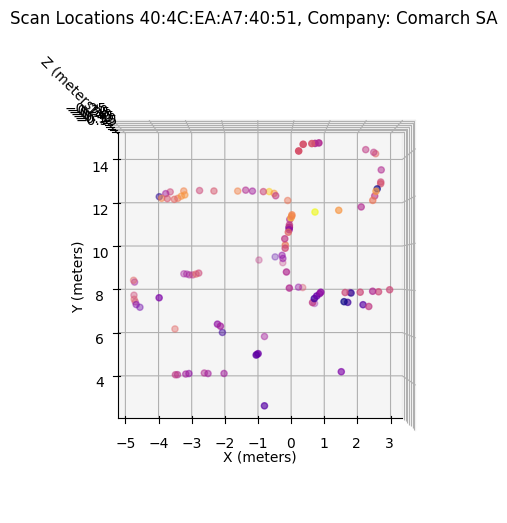

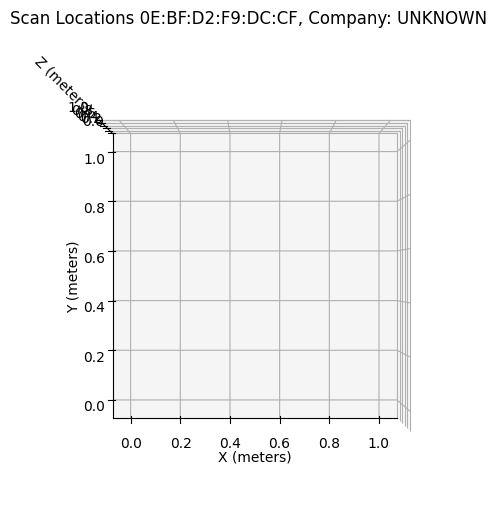

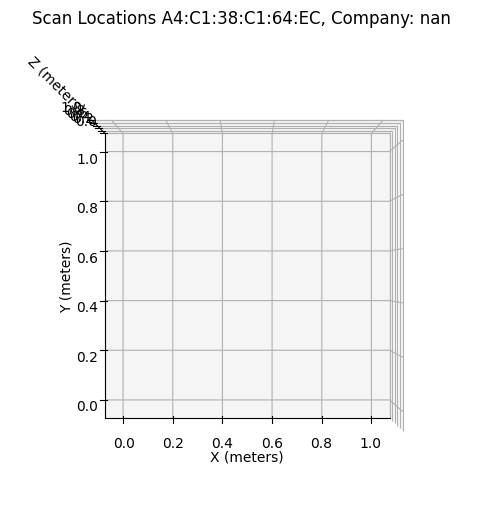

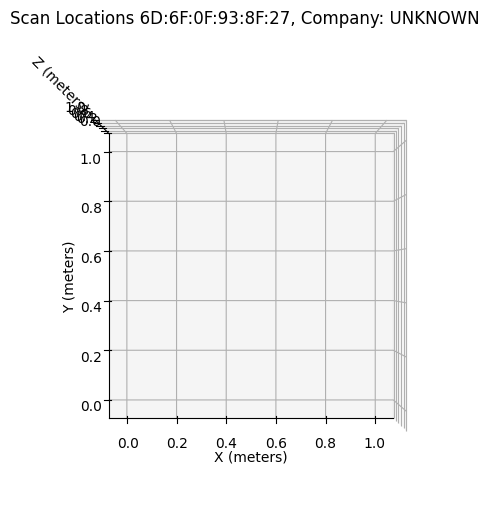

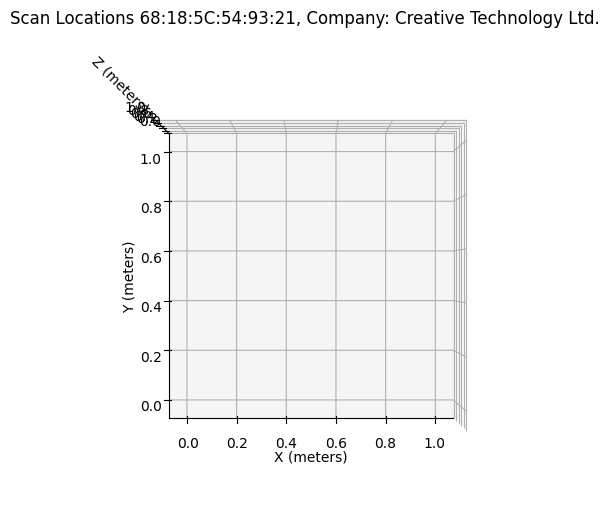

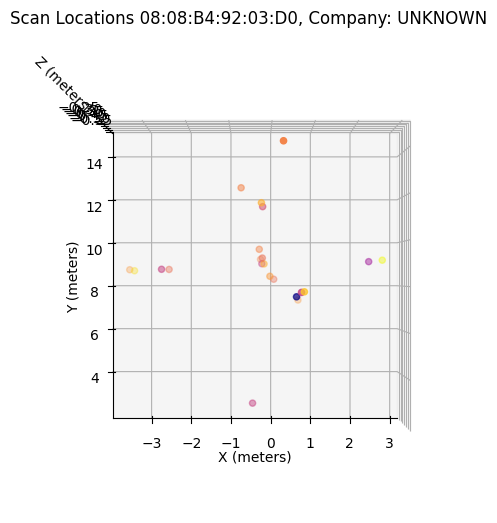

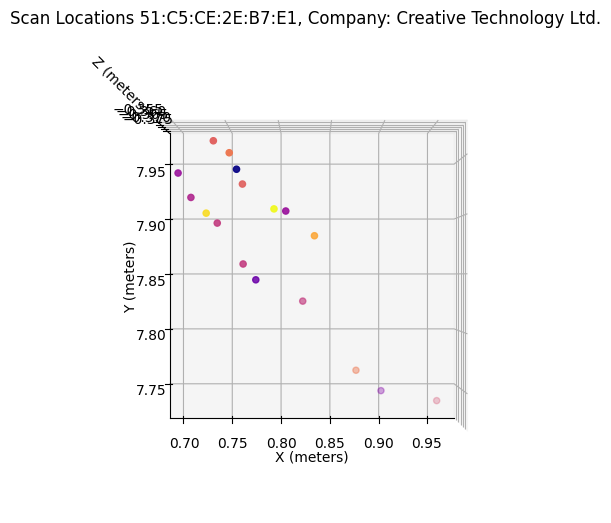

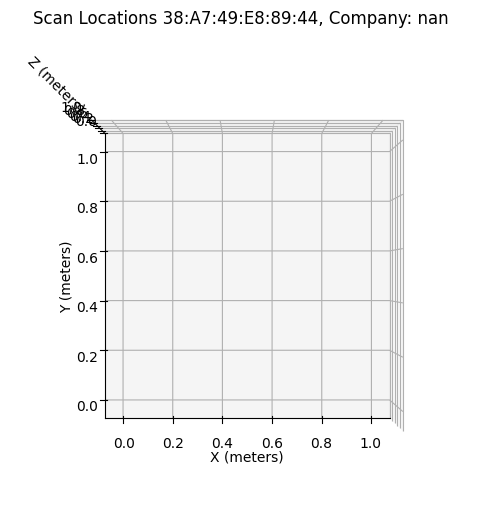

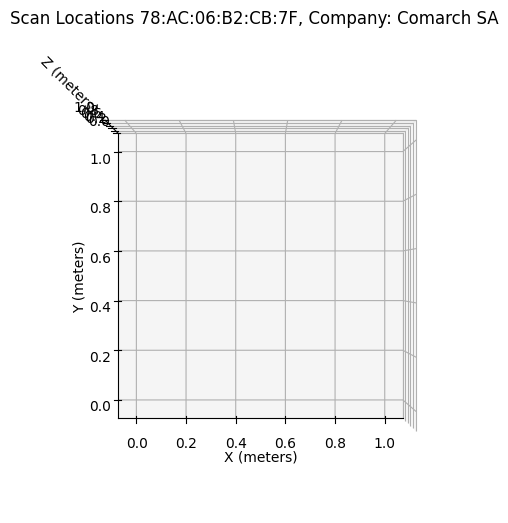

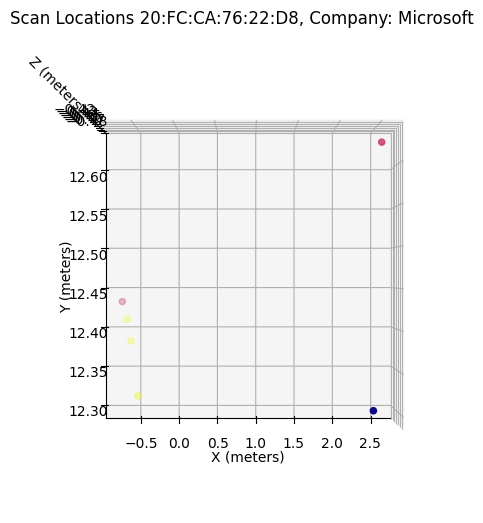

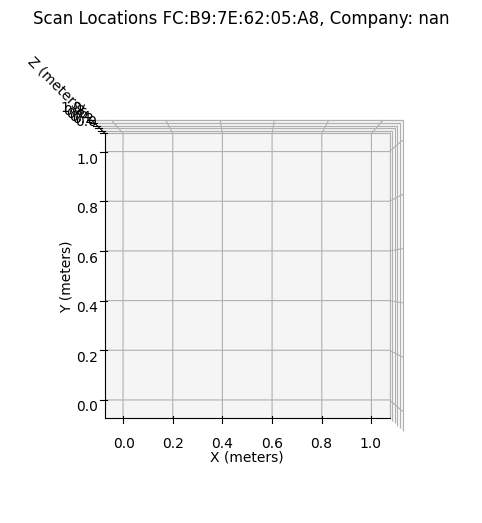

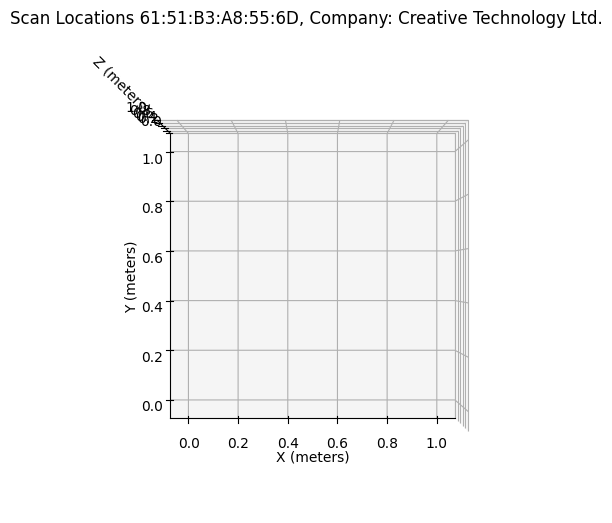

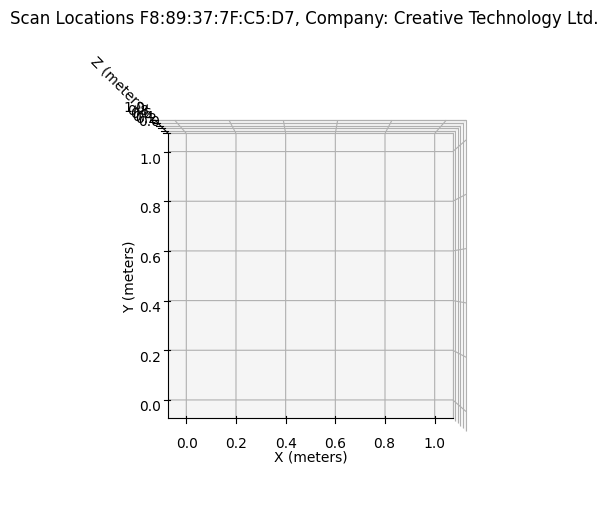

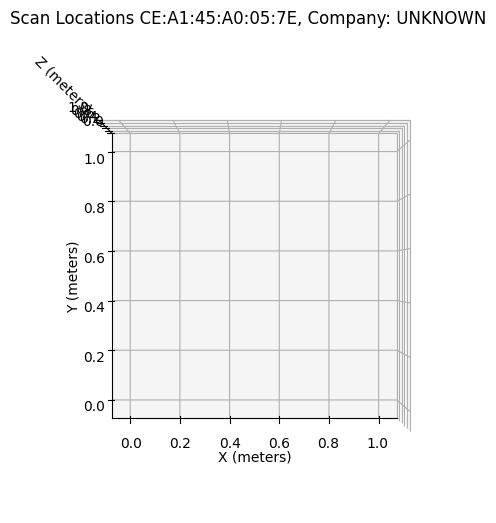

In [ ]:
max_plots= 100
i = 0
for mac_addr in df['address'].unique():
    if i > max_plots:
        break
    i+= 1


    addr_map = df.where(df['address'] == mac_addr).dropna(how="all")    

    company_name = addr_map['company_name'].iloc[0]
    ax = plt.figure().add_subplot(projection='3d')
    ax.figure.set_size_inches(8, 6)

    ax.set_xlabel('X (meters)')
    ax.set_ylabel('Y (meters)')
    ax.set_zlabel('Z (meters)')
    ax.set_title(f'Scan Locations {mac_addr}, Company: {company_name}', pad=20)

    ax.view_init(elev=90, azim=-90)  # Top-down view


    max_rssi = addr_map['rssi'].max()
    min_rssi = addr_map['rssi'].min()


    def normalize_rssi(rssi):
        return (rssi - min_rssi) / (max_rssi - min_rssi)

    colors = addr_map['rssi'].apply(normalize_rssi)

    ax.scatter(addr_map[x_str], addr_map[y_str], addr_map[z_str], c=colors, cmap='plasma', marker='o')
